In [1]:
import math
import numpy as np
import json
import random
import matplotlib.pyplot as plt
import copy
from sklearn import decomposition

In [2]:
ERROR = 0.000000001
MAXIT = 500

In [3]:
def kmeans(dataset,k):
    centers = [] 
    centers = initialize(dataset["matrix"],k)
    for i in range(len(dataset["cluster"])):
        dataset["cluster"][i] = getCluster(getPoint(dataset["matrix"],i),centers)
    k = 0
    oldCenters = copy.deepcopy(centers)
    while(True):
        for i in range(len(centers)):
            newCenter = getCenter(getClusterPoints(dataset,i))
            if newCenter == None:
                centers[i] = [0]*len(centers[i])
                continue
            centers[i] = newCenter
        for i in range(len(dataset["cluster"])):
            dataset["cluster"][i] = getCluster(getPoint(dataset["matrix"],i),centers)
        k+=1
        if k > MAXIT:
            break
        elif (not change(centers,oldCenters)) and k > 0:
            break
        oldCenters = copy.deepcopy(centers)
    print(k)
    dataset["centers"] = centers
    return dataset

In [4]:
def initialize(dataset,k):
    leng = len(dataset[0])
    point = -1
    points = []
    centers = []
    for i in range(k):
        center = []
        while(point in points):
            point = random.randint(0,leng-1)
        points.append(point)
        for i in dataset:
            center.append(i[point])
        centers.append(center)
    return centers

In [5]:
def getCenter(clusterPoints):
    leng = len(clusterPoints)
    if leng == 0:
        return None
    summ = np.array(clusterPoints[0])
    for i in range(1,leng):
        summ += np.array(clusterPoints[i])
    newCenter = []
    for i in summ:
        newCenter.append(i/leng)
    return newCenter

In [6]:
a = [[0,0],[2,0],[2,2],[0,2]]
print(getCenter(a))

[1.0, 1.0]


In [7]:
def getList(dataset,feature):
    array = []
    for i in dataset:
        array.append(i[feature])
    return array

In [8]:
def getDistance(point1,point2):
    distance = np.linalg.norm(np.array(point1) - np.array(point2))
    return distance

In [9]:
def getPoint(matrix,index):
    point = []
    for i in matrix:
        point.append(i[index])
    return point

In [10]:
def change(centers,oldCenters):
    change = False
    for i in range(len(centers)):
        distance = getDistance(centers[i],oldCenters[i])
        if (distance > ERROR):
            change = True
            break
    return change

In [11]:
def getCluster(point,centers):
    minDis = getDistance(centers[0],point)
    minPos = 0
    for i in range(1,len(centers)):
        dis = getDistance(centers[i],point)
        if minDis > dis:
            minDis = dis
            minPos = i
    return minPos

In [12]:
def getClusterPoints(dataset,cluster):
    clusterPoints = []
    for i in range(len(dataset["matrix"][0])):
        if dataset["cluster"][i] == cluster:
            clusterPoints.append(getPoint(dataset["matrix"],i))
    return clusterPoints

In [13]:
def getDataset(dataset):
    cleanDataset = {
        "matrix" : [],
        "cluster": [],
    }
    for i in dataset[0]:
        if i != "cluster":
            cleanDataset["matrix"].append(getList(dataset,i))
        elif i == "cluster":
            cleanDataset["cluster"] = getList(dataset,"cluster")
    return cleanDataset

In [14]:
def normalize(array):
    norm = np.linalg.norm(np.array(array))
    for i in range(len(array)):
        array[i] = array[i]/norm
    return array

In [15]:
def getObjectiveFunction(k,centers,dataset):
    J = 0
    for i in range(k):
        clusterPoints = getClusterPoints(dataset,i)
        for t in clusterPoints:
            J += math.pow(getDistance(t,centers[i]),2)
    return J

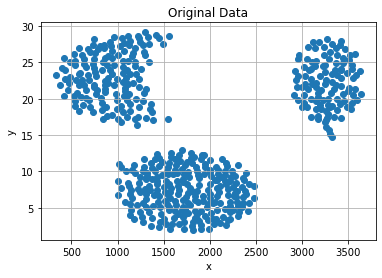

In [16]:
exist = True
try:
    f = open("../data/teacherData.json","r")
    stringSet = f.read()
    f.close()
except:
    print("Arquivo não existe")
    exist = False
if(exist):
    dataset = json.loads(stringSet)
    nDataset = getDataset(dataset)
    plt.scatter(nDataset["matrix"][0],nDataset["matrix"][1])
    plt.title("Original Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.savefig("../images/originalData1.jpg")

2
9
8
12
14
8
10
21
10
34


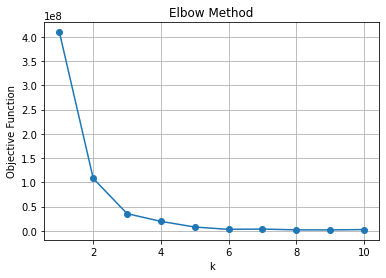

In [23]:
results0 = elbow(nDataset,"../images/Elbow1n.jpg",10)

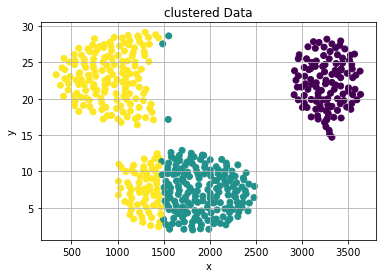

In [24]:
print2d(results0[2],"../images/clusteredData1n.jpg")

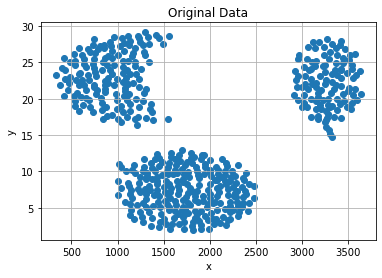

In [29]:
exist = True
try:
    f = open("../data/teacherData.json","r")
    stringSet = f.read()
    f.close()
except:
    print("Arquivo não existe")
    exist = False
if(exist):
    dataset = json.loads(stringSet)
    nDataset = getDataset(dataset)
    plt.scatter(nDataset["matrix"][0],nDataset["matrix"][1])
    plt.title("Original Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.savefig("../images/originalData1.png")
    for i in range(len(nDataset["matrix"])):
        nDataset["matrix"][i] = normalize(nDataset["matrix"][i])

In [19]:
def elbow(dataset,path,r):
    ks = []
    Js = []
    results = []
    for k in range(1,r+1):
        dataset = kmeans(dataset,k)
        results.append(copy.deepcopy(dataset))
        Js.append(getObjectiveFunction(3,dataset["centers"],dataset))
        ks.append(k)
        dataset["cluster"] = [-1]*len(dataset["matrix"][0])
    plt.plot(ks,Js,marker = "o")
    plt.title("Elbow Method")
    plt.xlabel("k")
    plt.ylabel("Objective Function")
    plt.grid(True)
    plt.savefig(path) 
    return results

In [20]:
def printKmeans(dataset,k,path,printable):
    print(getList(dataset,"cluster"))
    dataset["cluster"] = [-1]*len(dataset["matrix"][0])
    dataset = kmeans(nDataset,k)
    printable(dataset,path)

In [21]:
def print2d(dataset,path):
    plt.scatter(dataset["matrix"][0],dataset["matrix"][1],c = dataset["cluster"])
    plt.title("clustered Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.savefig(path) 

In [22]:
def printCount(dataset,path):
    counts = []
    ks = []
    for i in range(len(dataset["centers"])):
        counts.append(len(getClusterPoints(dataset,i)))
        ks.append(i)
    plt.bar(ks,counts)
    plt.title("Clusters length")
    plt.xlabel("Cluster")
    plt.ylabel("Number of elements in cluster")
    plt.grid(True)
    plt.savefig(path)

2
4
4
6
10
7
9
12
10
10


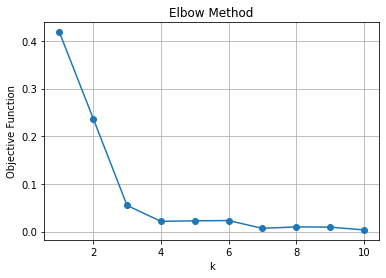

In [30]:
results1 = elbow(nDataset,"../images/Elbow1.jpg",10)

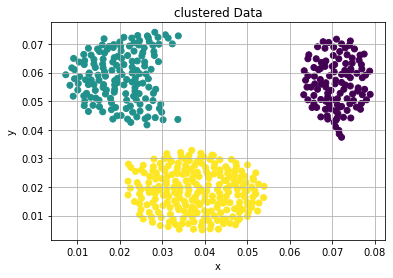

In [31]:
#printKmeans(results1[2],3,"../images/clusteredData1.png",print2d)
print2d(results1[2],"../images/clusteredData1.jpg")

In [27]:
exist = True
try:
    f = open("../data/strokeData.json","r")
    stringSet2 = f.read()
    f.close()
except:
    print("Arquivo não existe")
    exist = False
if(exist):
    dataset2 = json.loads(stringSet2)
    nDataset2 = getDataset(dataset2)
    for i in range(len(nDataset2["matrix"])):
        nDataset2["matrix"][i] = normalize(nDataset2["matrix"][i])

2
13
10
6
11
13
9
7
6
8
7
7
17
7
7


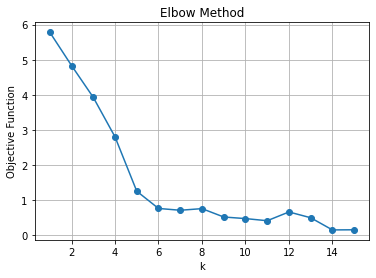

In [28]:
results2 = elbow(nDataset2,"../images/Elbow2.jpg",15)

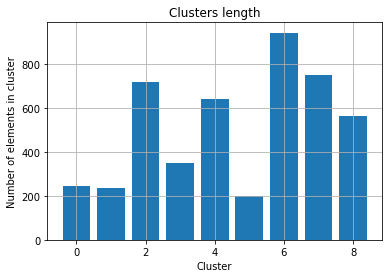

In [32]:
#printKmeans(results2[8],9,"../images/clusterCount2_9.png",printCount)
printCount(results2[8],"../images/clusterCount2_9.jpg")

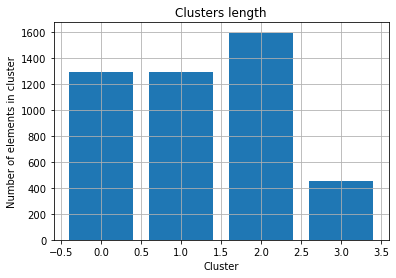

In [33]:
#printKmeans(results2[3],4,"../images/clusterCount2_4.png",printCount)
printCount(results2[3],"../images/clusterCount2_4.jpg")

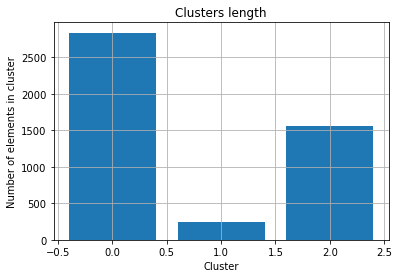

In [34]:
#printKmeans(results2[2],3,"../images/clusterCount2_3.png",printCount)
printCount(results2[2],"../images/clusterCount2_3.jpg")

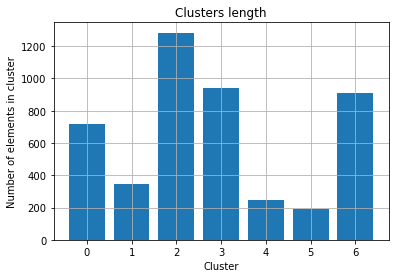

In [35]:
#printKmeans(results2[6],7,"../images/clusterCount2_7.png",printCount)
printCount(results2[6],"../images/clusterCount2_7.jpg")

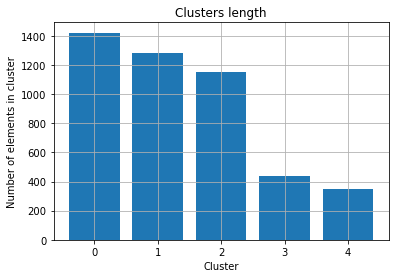

In [36]:
#printKmeans(results2[4],5,"../images/clusterCount2_5.png",printCount)
printCount(results2[4],"../images/clusterCount2_5.jpg")

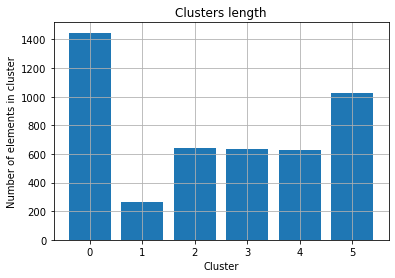

In [37]:
#printKmeans(results2[5],6,"../images/clusterCount2_6.png",printCount)
printCount(results2[5],"../images/clusterCount2_6.jpg")

In [38]:
def getPoints(matrix):
    newMatrix = []
    for i in range(len(matrix[0])):
        newMatrix.append(getPoint(matrix,i));
    return np.array(newMatrix);
        

In [39]:
def restore(points,dataset):
    newData = copy.deepcopy(dataset)
    newMatrix = []
    for i in range(len(points[0])):
        feature = []
        for j in points:
            feature.append(j[i])
        newMatrix.append(feature)
    newData["matrix"] = newMatrix
    newData["cluster"] = [-1]*len(dataset["cluster"])
    return newData

In [40]:
points = getPoints(nDataset2["matrix"])
print(points[0])
pca = decomposition.PCA(n_components=2)
pca.fit(points)
pcPoints = pca.transform(points)
print(pcPoints[0])

[ 0.00706648  0.0184303   0.          0.          0.          0.01169951
  0.          0.02575819  0.          0.06523281 -0.00050177]
[0.02438525 0.03351002]


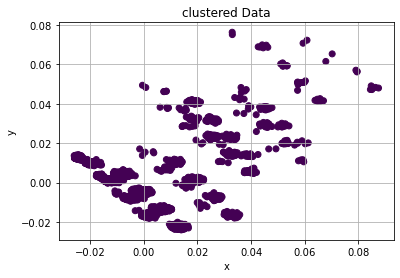

In [41]:
pcaDataset = restore(pcPoints,nDataset2)
print2d(pcaDataset,"../images/pcaDatasetK.jpg")

2
3
7
15
6
11
5
10
9
14
17
21
15
12
11
18
23
23
17
13
25
34
33
36
52
18
25
26
41
22


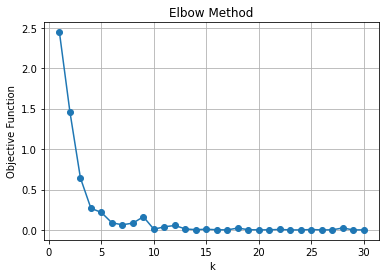

In [42]:
results3 = elbow(pcaDataset,"../images/ElbowPCAK.jpg",30)

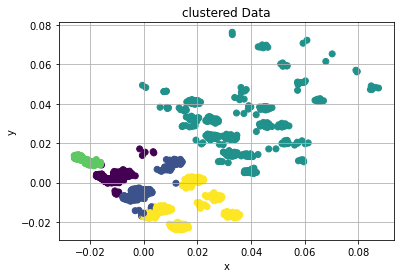

In [44]:
print2d(results3[4],"../images/clusteredPCADataK5.jpg")

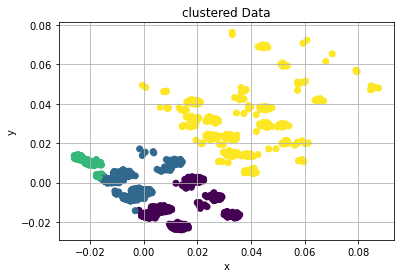

In [45]:
print2d(results3[3],"../images/clusteredPCADataK4.jpg")

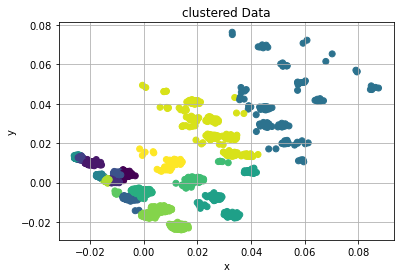

In [46]:
print2d(results3[16],"../images/clusteredPCADataK17.jpg")

In [47]:
exist = True
try:
    f = open("../data/strokeData.json","r")
    stringSet2 = f.read()
    f.close()
except:
    print("Arquivo não existe")
    exist = False
if(exist):
    dataset2 = json.loads(stringSet2)
    nDataset2 = getDataset(dataset2)

In [48]:
points = getPoints(nDataset2["matrix"])
print(points[0])
pca = decomposition.PCA(n_components=2)
pca.fit(points)
pcPoints = pca.transform(points)
print(pcPoints[0])

[  1.    61.     0.     0.     0.     2.     0.   202.21   0.     1.
  -1.  ]
[97.26203711  0.37019259]


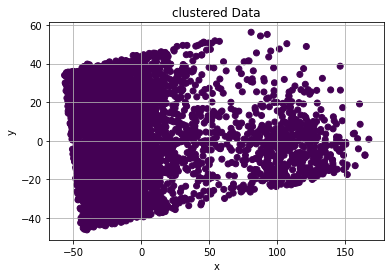

In [49]:
pcaDataset = restore(pcPoints,nDataset2)
print2d(pcaDataset,"../images/pcaDatasetK.jpg")

2
9
17
17
70
23
45
60
33
86
34
42
25
44
86
92
31
116
134
64
47
77
74
97
47
102
90
69
83
90


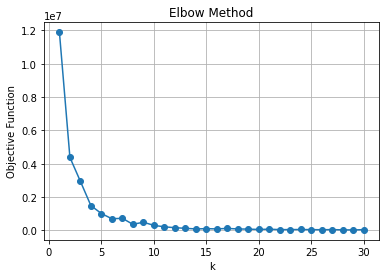

In [50]:
results4 = elbow(pcaDataset,"../images/ElbowPCAK.jpg",30)

In [ ]:
print2d(results4[4],"../images/clusteredPCADataK5n.jpg")